In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import animation, rc
rc('animation', html='jshtml')
from matplotlib import cm
from scipy.spatial import distance
from itertools import permutations

In [2]:
"""
Unique routes in the following class is created
under the assumption that one doesn't
return  to starting point every time, 
i.e.: A->B->C->D and not A->B->C->D->A
Therefore n!/2 different routes
exists.
"""
class Cities:
    def __init__(self, N_cities, city_interval):
        self.N_cities        = N_cities
        self.city_interval   = city_interval
        self.cities          = self.generate_cities()
        self.routes          = self.generate_routes()
        self.lengths         = self.route_lengths('routes')
        self.unique_routes   = self.unique_routes()
        self.unique_lengths  = self.route_lengths('unique routes')

    def generate_cities(self):
        """ 
        A method for generating 'N_cities' number of
        cities in 'city_interval' interval.
        Here each row represents the coordinates 
        for the given city, s.t. city_i = [float1,float2]

        returns:
            numpy array of shape (N,K) where N = N_cities 
            and K = number of coordinates to represent given city

        """
        return np.array([np.random.uniform(0.0,1.0,size=2)*self.city_interval \
                         for i in range(self.N_cities)])
    
    def generate_routes(self):
        """
        Generates the n! differents ways of combining
        'n' elements, for instance, if n = 3:

        routes: (A,B,C), (A,C,B), (B,C,A), 
                (B,A,C), (C,A,B), (C,B,A)

        Returns:
            numpy array of shape (M,N,K), where M = Number of
            different routes and N = N_cities 
            and K = number of coordinates to represent given city
        """
        return np.array([list(list(permutations(self.cities))[i]) \
                         for i in range(len(list(permutations(self.cities))))])

    def unique_routes(self):
        """
        A method for calculating the different unique routes
        between each of the cities s.t.: A->B->C == C->B->A 
        i.e. len(unique_rotes) = N_cities!/2. 

        Returns:
            Numpy array of shape (X,) where X is the 
            number of unique routes.
        """
        unique_routes, indexes = np.copy(self.routes), []
        for i in range(len(self.routes)):
            current_route = self.routes[i]
            for j in range(i,len(self.routes)):
                if np.all(np.flip(current_route,axis=0) == self.routes[j]):
                    indexes.append(j)
        return unique_routes[indexes]

    def route_lengths(self,collection):
        """
        A method for calculating the total euclidian
        distance a route consitutes
        
        Returns:
            numpy array of shape (N,) with 
            N = len(routes)
        """

        if collection == 'unique routes':
            routes = self.unique_routes
        if collection == 'routes':
            routes = self.routes
        distances = np.zeros(len(routes))

        for j in range(len(routes)):
            route = routes[j]
            for i in range(len(route)-1):
                distances[j] += np.linalg.norm(route[i]-route[i+1])
            distances[j] = np.round(distances[j],4)
        return distances





In [120]:
lim,N_cities   = 10, 3
test           = Cities(N_cities,lim)
cities         = test.cities 
unique_routes  = test.unique_routes
routes         = test.routes
route_lengths  = test.lengths
unique_lengths = test.unique_lengths


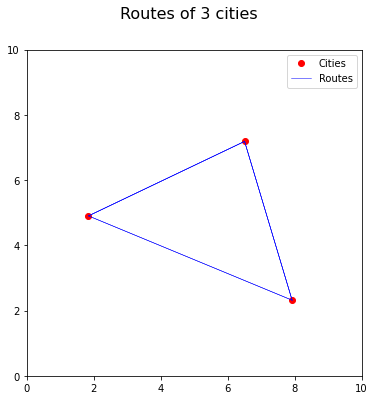

In [121]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
fig.suptitle(f'Routes of {N_cities} cities', fontsize=16)
ax.plot(cities[:,0],cities[:,1],'ro',label='Cities')
ax.plot(unique_routes[0][:,0],unique_routes[0][:,1],'b-',lw=0.5,label='Routes')
for i in range(len(unique_routes)):
    ax.plot(unique_routes[i][:,0],unique_routes[i][:,1],'b-',lw=0.5)
ax.legend(),ax.set_xlim(0,lim), ax.set_ylim(0,lim)
plt.show()



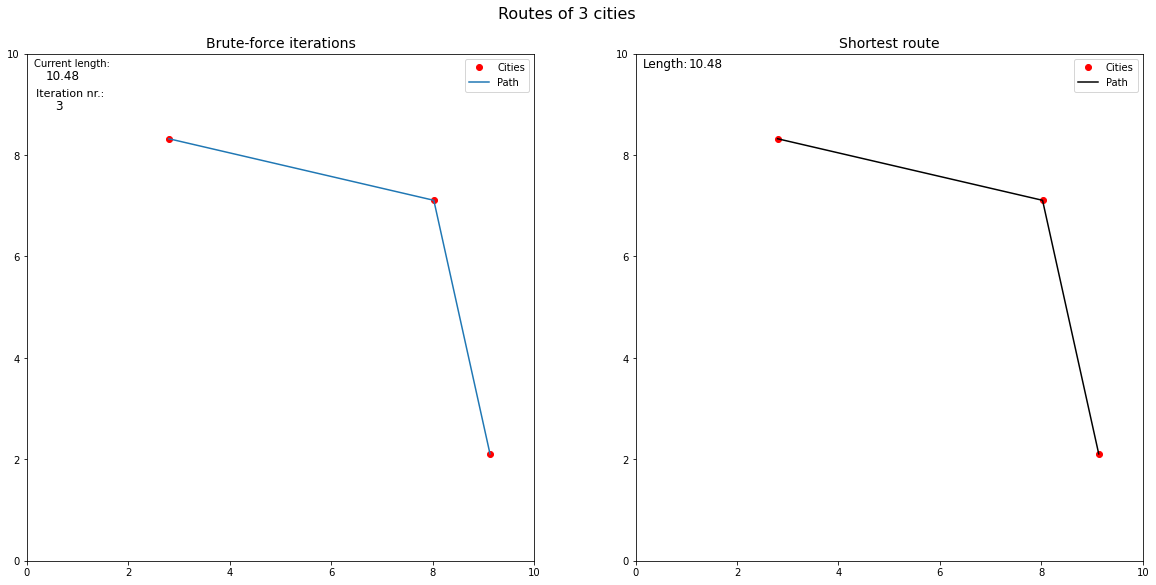

In [116]:

fig, ax = plt.subplots(1,2,figsize = (20,10))
fig.suptitle(f'Routes of {N_cities} cities', y = 0.92, fontsize=16)

### Left plot ###
ax[0].set_title('Brute-force iterations',size=14)
ax[0].plot(test.cities[:,0],test.cities[:,1],'ro',label='Cities')
ax[0].text(x=0.15,y=10-0.25,s='Current length:')
ax[0].text(x=0.175,y=10-0.85,s='Iteration nr.:',fontsize=11)

paths,         = ax[0].plot([],[],label='Path')
dist_text      = ax[0].text(x=0.38,y=9.5,s='',fontsize=12)
iteration_text = ax[0].text(x=0.55,y=8.9,s='',fontsize=12)

ax[0].set_xlim(0,lim), ax[0].set_ylim(0,lim)
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend(loc = 'upper right')

### Right plot ###
ax[1].set_title('Shortest route',size=14)
ax[1].plot(test.cities[:,0],test.cities[:,1],'ro',label='Cities')
ax[1].text(x=0.15,y=9.73,s='Length:',fontsize=12)

paths2,         = ax[1].plot([],[],color='black',label='Path')
dist_text2      = ax[1].text(x=1.05,y=9.73,s='',fontsize=12)

ax[1].set_xlim(0,lim), ax[1].set_ylim(0,lim)
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend(loc = 'upper right')

updatable = [unique_lengths[0],unique_routes[0]]
def update(i,comparator=updatable):
    ## Updating left plot ##
    dist_text.set_text(np.round(unique_lengths[i],2))
    iteration_text.set_text(i+1)
    paths.set_data(unique_routes[i][:,0],unique_routes[i][:,1])

    ## Updating right plot ##
    if unique_lengths[i] < comparator[0]:
        comparator[0] = unique_lengths[i]
        comparator[1] = unique_routes[i]
    dist_text2.set_text(np.round(comparator[0],2))
    paths2.set_data(comparator[1][:,0],comparator[1][:,1])
    
    return paths, dist_text, iteration_text,


anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(unique_routes),
                               interval=150,
                               blit=True,
                               repeat_delay=100)

## Uncomment below to save gif ##
#anim.save("TravelingSalesmanBruteforce3.gif", dpi=100, writer=animation.PillowWriter(fps=6))

anim

In [4]:
"""
Unique routes in the following class is created
under the assumption that one returns to starting 
point every time, i.e.: 
A->B->C->D->A and not A->B->C->D
Therefore only (n-1)!/2 different routes
exists.
"""

class Cities2:
    def __init__(self, N_cities, city_interval):
        self.N_cities        = N_cities
        self.city_interval   = city_interval
        self.cities          = self.generate_cities()
        self.routes          = self.generate_routes()
        self.lengths         = self.route_lengths('routes')
        self.unique_routes   = self.unique_routes()
        self.unique_lengths  = self.route_lengths('unique routes')

    def generate_cities(self):
        """ 
        A method for generating 'N_cities' number of
        cities in 'city_interval' interval.
        Here each row represents the coordinates 
        for the given city, s.t. city_i = [float1,float2]

        returns:
            numpy array of shape (N,K) where N = N_cities 
            and K = number of coordinates to represent given city

        """
        return np.array([np.random.uniform(0.0,1.0,size=2)*self.city_interval \
                         for i in range(self.N_cities)])
    
    def generate_routes(self):
        """
        Generates the n! differents ways of combining
        'n' elements, for instance, if n = 3:

        routes: (A,B,C), (A,C,B), (B,C,A), 
                (B,A,C), (C,A,B), (C,B,A)

        Returns:
            numpy array of shape (M,N,K), where M = Number of
            different routes and N = N_cities 
            and K = number of coordinates to represent given city
        """
        return np.array([list(list(permutations(self.cities))[i]) \
                         for i in range(len(list(permutations(self.cities))))])


    def route_lengths(self,collection):
        """
        A method for calculating the total euclidian
        distance a route consitutes
        (ending at start point)

        Returns:
            numpy array of floats
        """

        if collection == 'unique routes':
            routes = self.unique_routes
            distances = np.zeros(len(self.unique_routes))
        if collection == 'routes':
            routes = self.routes
            distances = np.zeros(len(self.routes))

        for j in range(len(routes)):
            route = routes[j]
            for i in range(len(route)-1):
                distances[j] += np.linalg.norm(route[i]-route[i+1])
            distances[j] += np.linalg.norm(route[-1]-route[0])
            distances[j]  = np.round(distances[j],4) 
        return distances

    def unique_routes(self):
        """
        A method for calculating the different unique routes
        in the case where one returns to starting city,
        i.e.: only (N_cities-1)!/2 different length routes. 

        Returns:
            Numpy array of shape (X,) where X is the 
            number of unique routes.
        """
        unique_dists, unique_indexes = np.unique(self.lengths,return_index=True)

        return self.routes[unique_indexes]



In [29]:
lim, N_cities  = 10, 5
test           = Cities2(N_cities,lim)
cities         = test.cities 
unique_routes  = test.unique_routes
routes         = test.routes
route_lengths  = test.lengths
unique_lengths = test.unique_lengths

## Shuffling to ensure that first route isn't shortest (looks bad on anim) ##
perm_array = np.random.permutation(len(unique_routes))
unique_routes, unique_lengths = unique_routes[perm_array], unique_lengths[perm_array]

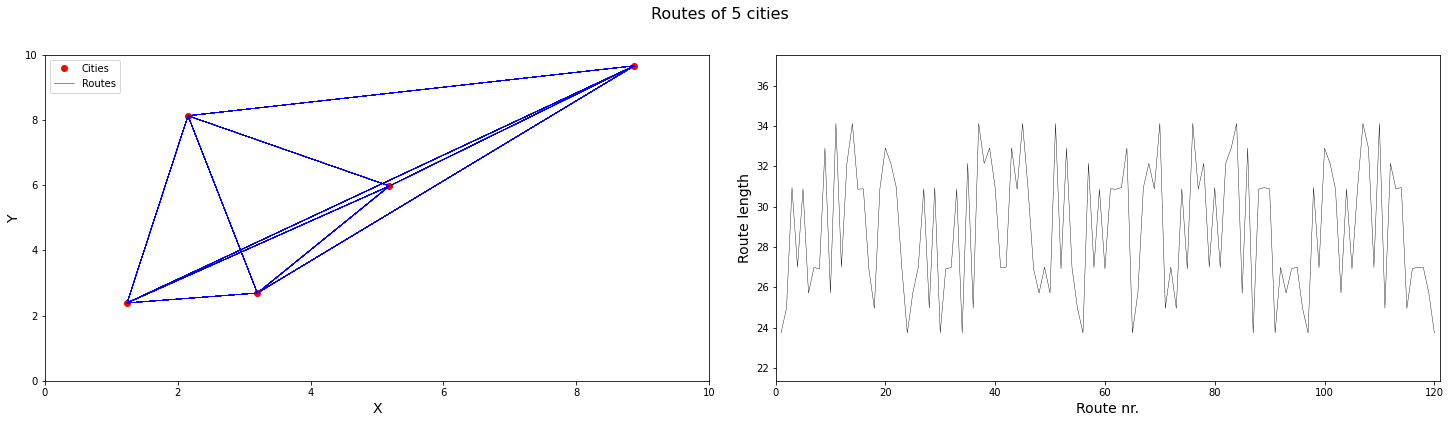

In [30]:
fig, ax = plt.subplots(1,2,figsize = (25,6))
fig.suptitle(f'Routes of {N_cities} cities', fontsize=16,y=0.99)
fig.subplots_adjust(wspace=0.1)

unique_routes = routes
unique_lengths = route_lengths


ax[0].plot(cities[:,0],cities[:,1],'ro',label='Cities')
ax[0].plot(unique_routes[0][:,0],unique_routes[0][:,1],'b-',lw=0.5,label='Routes')
for i in range(len(unique_routes)):
    ax[0].plot(unique_routes[i][:,0],unique_routes[i][:,1],'b-',lw=0.5)
ax[0].legend(),ax[0].set_xlim(0,lim), ax[0].set_ylim(0,lim)
ax[0].set_xlabel('X',fontsize=14),ax[0].set_ylabel('Y',fontsize=14)
#ax[0].set_aspect('equal', adjustable='box')

route_nr = np.arange(1,len(unique_routes)+1,1)
ax[1].plot(route_nr,unique_lengths,'k-',lw=.4)
ax[1].set_xlim(0,len(unique_routes)+1), ax[1].set_ylim(0.9*np.amin(unique_lengths),1.1*np.amax(unique_lengths))
ax[1].set_xlabel('Route nr.',fontsize=14),ax[1].set_ylabel('Route length',fontsize=14)

plt.show()


KeyboardInterrupt: 

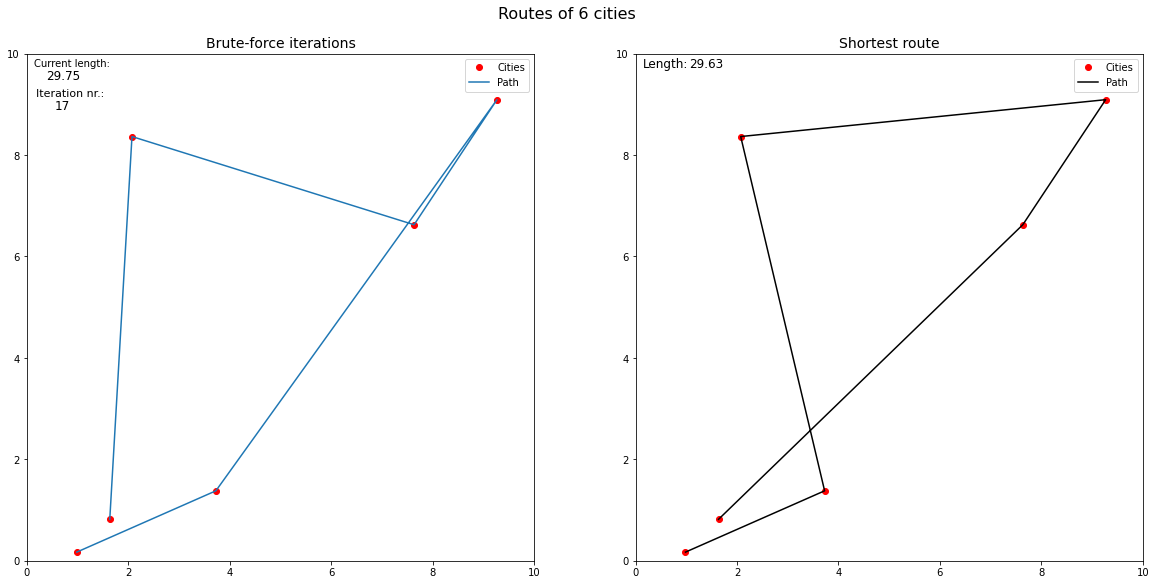

In [20]:
## Plotting ##
fig, ax = plt.subplots(1,2,figsize = (20,10))
fig.suptitle(f'Routes of {N_cities} cities',y = 0.92, fontsize=16)

### Left plot ###
ax[0].set_title('Brute-force iterations',size=14)
ax[0].plot(test.cities[:,0],test.cities[:,1],'ro',label='Cities')
ax[0].text(x=0.15,y=10-0.25,s='Current length:')
ax[0].text(x=0.175,y=10-0.85,s='Iteration nr.:',fontsize=11)

paths,         = ax[0].plot([],[],label='Path')
dist_text      = ax[0].text(x=0.38,y=9.5,s='',fontsize=12)
iteration_text = ax[0].text(x=0.55,y=8.9,s='',fontsize=12)

ax[0].set_xlim(0,lim), ax[0].set_ylim(0,lim)
ax[0].set_aspect('equal', adjustable='box')
ax[0].legend(loc = 'upper right')

### Right plot ###
ax[1].set_title('Shortest route',size=14)
ax[1].plot(test.cities[:,0],test.cities[:,1],'ro',label='Cities')
ax[1].text(x=0.15,y=9.73,s='Length:',fontsize=12)

paths2,         = ax[1].plot([],[],color='black',label='Path')
dist_text2      = ax[1].text(x=1.05,y=9.73,s='',fontsize=12)

ax[1].set_xlim(0,lim), ax[1].set_ylim(0,lim)
ax[1].set_aspect('equal', adjustable='box')
ax[1].legend(loc = 'upper right')

updatable = [unique_lengths[0],unique_routes[0]]
def update(i,comparator=updatable):
    ## Updating left plot ##
    dist_text.set_text(np.round(unique_lengths[i],2))
    iteration_text.set_text(i+1)
    paths.set_data(unique_routes[i][:,0],unique_routes[i][:,1])

    ## Updating right plot ##
    if unique_lengths[i] < comparator[0]:
        comparator[0] = unique_lengths[i]
        comparator[1] = unique_routes[i]
    dist_text2.set_text(np.round(comparator[0],2))
    paths2.set_data(comparator[1][:,0],comparator[1][:,1])
    
    return paths, dist_text, iteration_text,


anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(unique_routes),
                               interval=150,
                               blit=True,
                               repeat_delay=100)

## Uncomment below to save gif ##
#anim.save("TravelingSalesmanBruteforce2.gif", dpi=100, writer=animation.PillowWriter(fps=6))

anim

In [151]:
route_nr = np.arange(1,len(unique_routes)+1,1)
unique_lengths

array([18.1481, 18.6199, 19.4902, 19.5279, 19.5533, 19.7238, 19.8656,
       19.9997, 20.0621, 20.1866, 20.1957, 20.3831, 20.5489, 20.5612,
       20.612 , 20.7449, 20.7826, 20.808 , 20.8822, 20.9226, 20.9311,
       21.0188, 21.0331, 21.1185, 21.1968, 21.22  , 21.2544, 21.2859,
       21.293 , 21.3398, 21.3451, 21.3537, 21.3541, 21.3927, 21.4164,
       21.4871, 21.5416, 21.614 , 21.6772, 21.7074, 21.7084, 21.716 ,
       21.7705, 21.9745, 22.022 , 22.0284, 22.032 , 22.037 , 22.0707,
       22.0916, 22.1246, 22.1554, 22.1704, 22.1772, 22.1878, 22.251 ,
       22.3024, 22.3109, 22.3364, 22.3768, 22.3917, 22.4039, 22.4124,
       22.4379, 22.4443, 22.4514, 22.4549, 22.5095, 22.5181, 22.5458,
       22.5475, 22.5712, 22.572 , 22.5766, 22.5997, 22.6003, 22.6057,
       22.6403, 22.6418, 22.671 , 22.6911, 22.6964, 22.7054, 22.7926,
       22.7962, 22.8297, 22.8383, 22.8451, 22.9022, 22.9158, 22.9229,
       22.9259, 22.9267, 23.057 , 23.0808, 23.1037, 23.1514, 23.1662,
       23.1768, 23.1

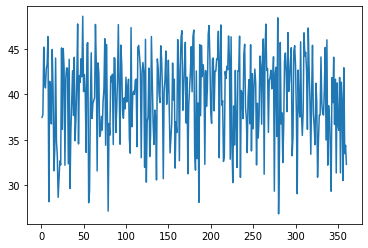

In [161]:
plt.plot(route_nr,unique_lengths)